<a href="https://colab.research.google.com/github/6170chandan/All-about-Linear-Regression/blob/6170chandan-insurance_prediction_/Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this dataset "expenses" is the target variable and the rest variable like 'age', 'sex', 'children', 'smoker','bmi','region' are independent variables or predictors.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and examining the data quality and types inside it.

In [3]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
df = pd.read_csv("/content/drive/MyDrive/Linear Regression/insurance data (linear regression).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


So, from the above information we have :
* Categorical Variables: sex, smoker, region, 
* Numerical Variables : age, children, bmi, expenses
* As non-null is showing no missing data

# Exploratory data analysis
* It necessary to find the correlated independent variables.


#Univariate Analysis

* Visualizing the data distribution using histogram for numeric variables.
* And categorical variables by the help of bar charts.

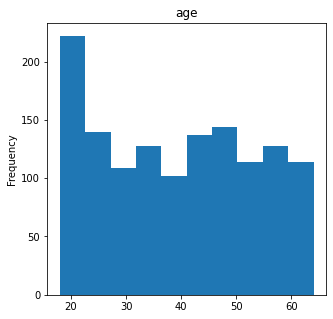

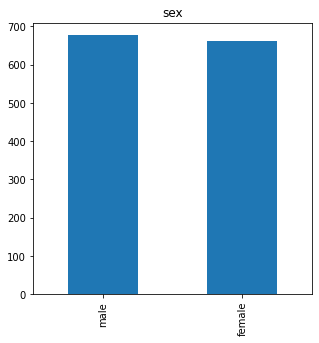

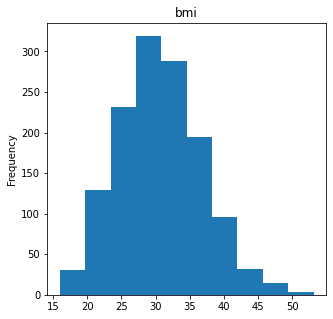

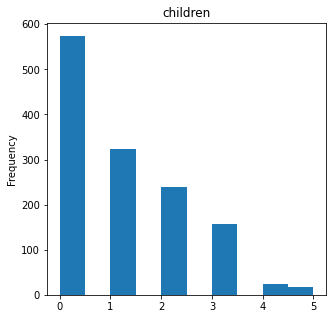

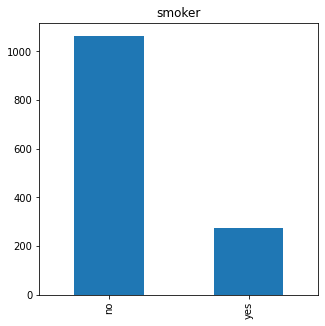

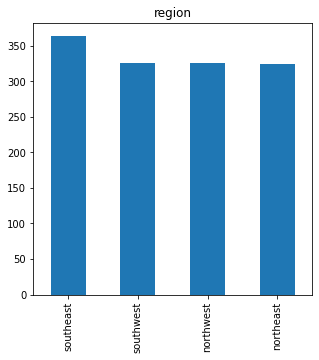

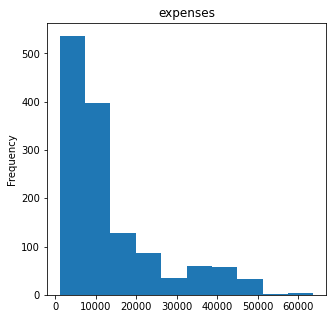

In [7]:
num_list = []
cat_list = []

for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
      df[column].plot(kind = "hist")
      num_list.append(column)
    elif is_string_dtype(df[column]):
      df[column].value_counts()[:10].plot(kind = "bar")
      cat_list.append(column)  



In [8]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [9]:
num_list

['age', 'bmi', 'children', 'expenses']

# Why do we need univariate analysis?
* Identify if the data contains outliers.
* Identify if need data transformation or feature engineering.

* For expenses, we found out that it follows "power law distribution", so it will require log transformation as a step of feature enginnering.

* After applying log transformation on the above data, we will be having **"Normal Distribution"**.

# Multivariate Analysis:
When thinking  about Linear Regression, the first visualisation is scatterplot.

By Scatterplot 

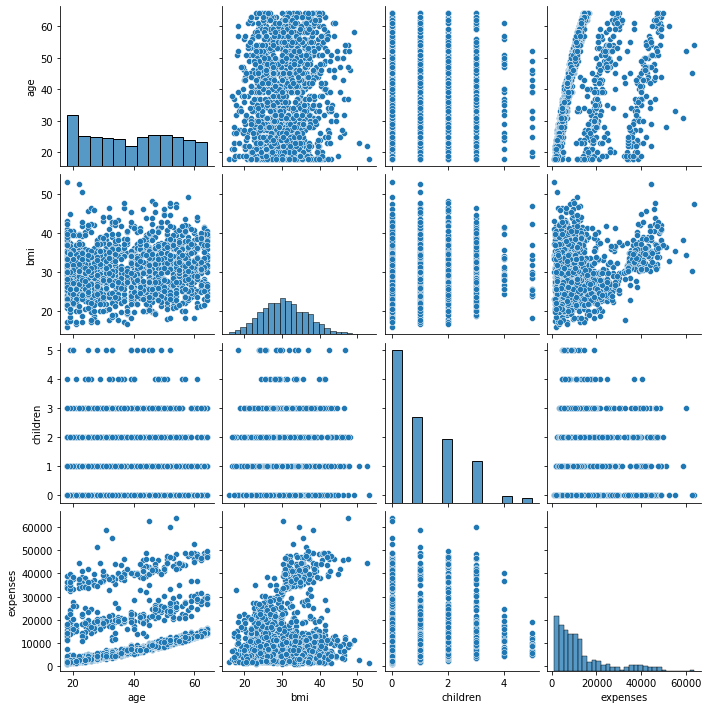

In [10]:
sns.pairplot(df)

In [11]:
len(cat_list)

3

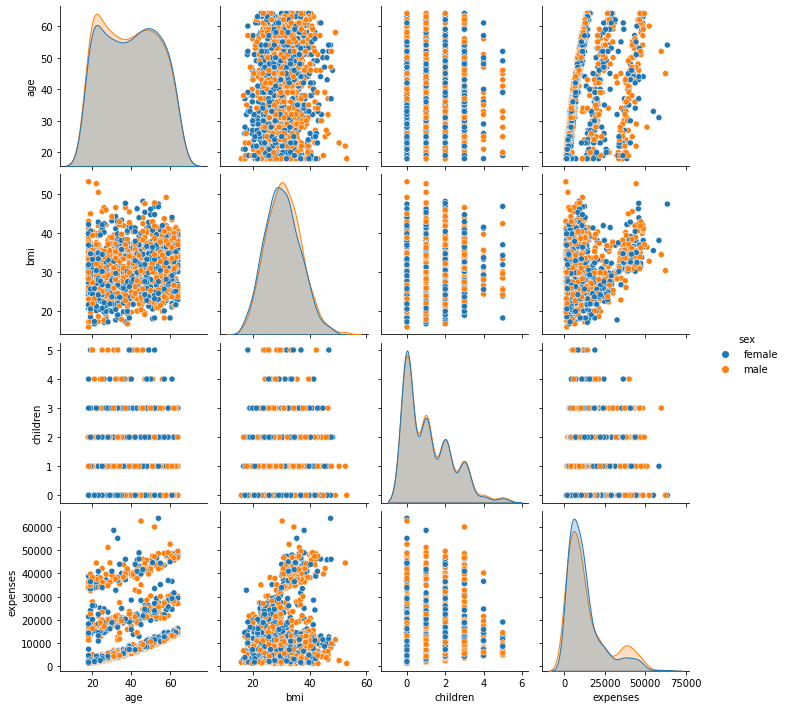

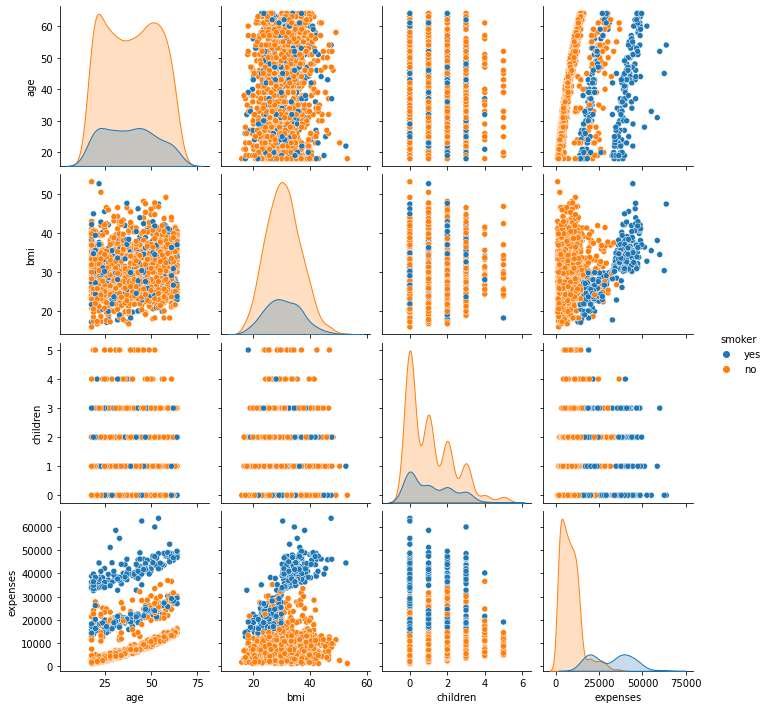

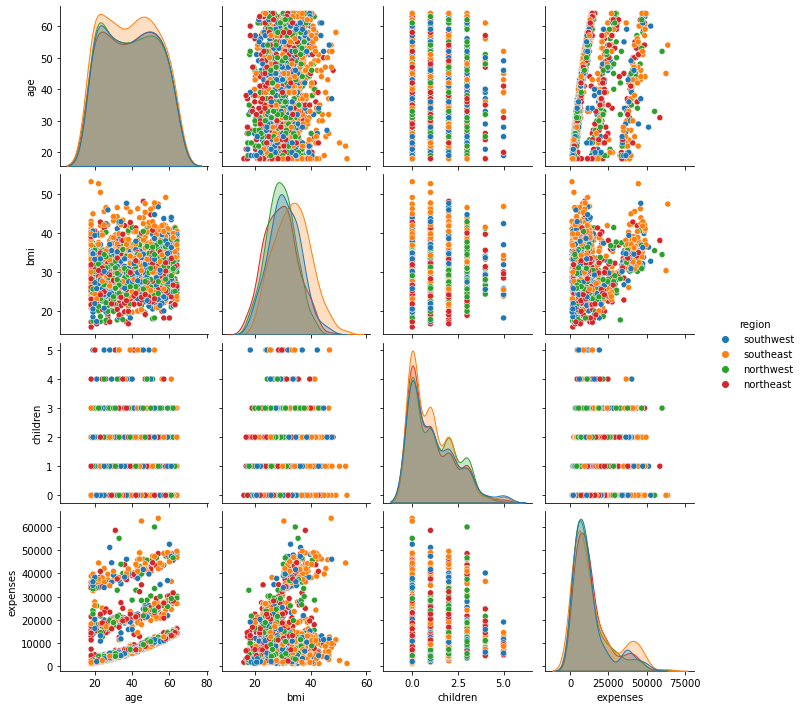

In [12]:
# Pairplot with hue
for i in range(0, len(cat_list)):
  hue_cat = cat_list[i]
  sns.pairplot(df, hue = hue_cat, diag_kind = 'kde')


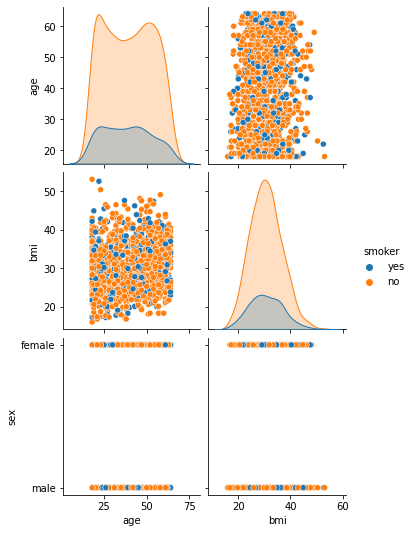

In [23]:
sns.pairplot(df,x_vars=["age", "bmi"], y_vars=["age", "bmi",'sex'],hue = "smoker")

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# The below graphical plot between expenses and age,bmi,children and expenses on the basis of smoker.

Here smokers are having high expenses which is depicted in blue color.

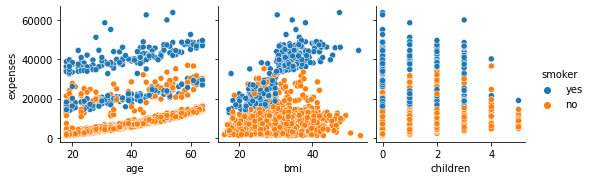

In [24]:
sns.pairplot(df,x_vars= ['age','bmi','children'], y_vars= ['expenses'], hue= 'smoker')

# Correlation Analysis
 Correlation analysis examines the linear correlation between variable pairs.
  
 By the help of Heatmap, we can know how the variables are related to each other.
 Relations between them may be weak, strong,partially weak, partially strong etc. which is decided on the basis of number which is between -1 and 1.  

Correlation is achieved by combining corr() function with sns.heatmap().

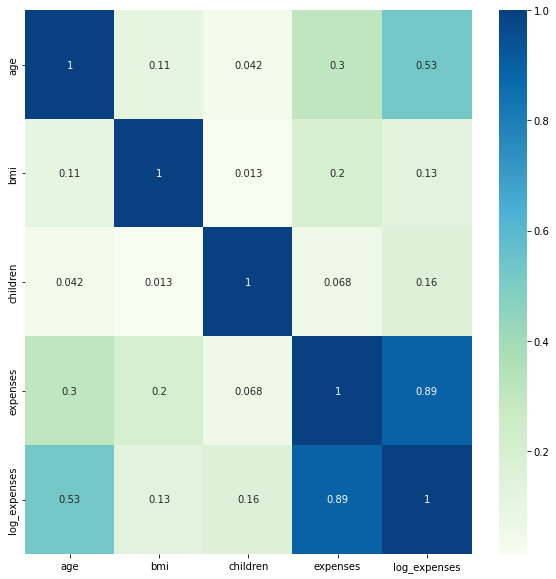

In [30]:
plt.figure(column, figsize = (10,10))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

# Feature Engineering


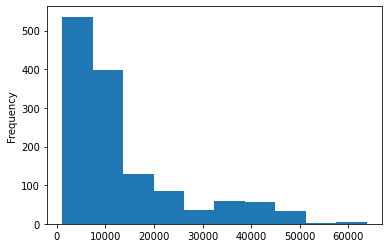

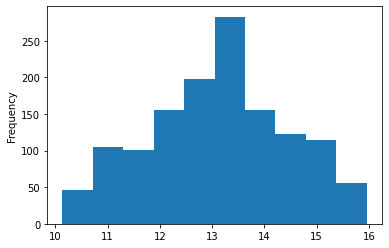

In [29]:
df['log_expenses'] = np.log2(df['expenses']+1)
plt.figure(1)
df['expenses'].plot(kind = 'hist')

plt.figure(2)
df['log_expenses'].plot(kind = 'hist')

# Encoding categorical variable
Another requirement of machine learning algorithm is to encode the categorical variable to numerical values.

There are two common methods are there for encoding "One-hot encoding' and 'label encoding'.

# **One hot encoding**

In [31]:
df = pd.get_dummies(df, columns = cat_list)

In [32]:
df

,age,bmi,children,expenses,log_expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,14.043533,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,10.753676,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,12.119739,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,14.424263,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,11.917320,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,13.371988,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,11.107858,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,10.671391,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,10.972226,1,0,1,0,0,0,0,1


* Label encoding: By the hep of this method, categorical data can also be encoded.

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

for i in cat_list:

  df[i] = LabelEncoder().fit_transform(df[i])

# **Model Implementation**

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = True)
model.fit(X_train, y_train)
y_pred = model.predict(x_test)
coef = model.coef_
intercept = model.intercept_

NameError: ignored

In [34]:
sns.barplot(x = X_train.columns, y = coef, palette = "GnBu")

NameError: ignored

Recall that we have log transformed the target variable, therefore don’t forget to used 2**y_pred to revert back to the actual predicted expenses.

In [35]:
expenses_pred = 2**y_pred
sns.histplot(expenses_pred, bins = s=50)

SyntaxError: ignored

# **Model Evaluation**
Linear regression model can be qualitatively evaluated by visualizing error distribution. There are also quantitative measures such as MAE, MSE, RMSE and R squared.

In [36]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error


plt.figure()
sns.histplot((y_test - y_pred),bin = 50)

print("MAE:", metric.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R Squared:', round(model.score(X_test, y_test),2))

NameError: ignored

<Figure size 432x288 with 0 Axes>